In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv(r'C:\Users\sachin-selvam\Desktop\task 1\linear_model.ipynb')
df

,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4
5,11.0,60,24.0
6,5.5,85,16.0
7,9.8,68,21.7
8,7.2,77,19.0
9,6.0,88,17.0


In [ ]:
df.isnull().sum()

hours_sunlight       0
humidity_level       0
daily_temperature    0
dtype: int64

In [ ]:
df.describe()

,hours_sunlight,humidity_level,daily_temperature
count,49.000000,49.000000,49.000000
mean,8.159184,75.510204,19.691837
std,1.783480,9.021092,2.458305
min,4.300000,60.000000,15.000000
25%,6.700000,69.000000,17.400000
50%,8.200000,75.000000,19.400000
75%,9.500000,84.000000,21.300000
max,11.200000,92.000000,24.300000


In [ ]:
x = df[['hours_sunlight']]
y = df['daily_temperature']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
print(model.coef_)
print(model.intercept_)

[1.35860132]
8.57156454491374


In [ ]:
predict = model.predict(x_test)

In [ ]:
mae = mean_absolute_error(predict,y_test)
mse = mean_squared_error(predict,y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predict)

print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  0.2427422402631482
MSE :  0.08965014143068223
RMSE :  0.29941633460898925
R2 :  0.9871789169053998


In [ ]:

hours_new = np.array([[5],
                      [8],
                      [12]])

pred_new = model.predict(hours_new)

for h, p in zip(hours_new.flatten(), pred_new):
    print(f"Predicted temperature for {h} hours sunlight: {p:.2f}")


Predicted temperature for 5 hours sunlight: 15.36
Predicted temperature for 8 hours sunlight: 19.44
Predicted temperature for 12 hours sunlight: 24.87


c:\Users\111si\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\111si\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


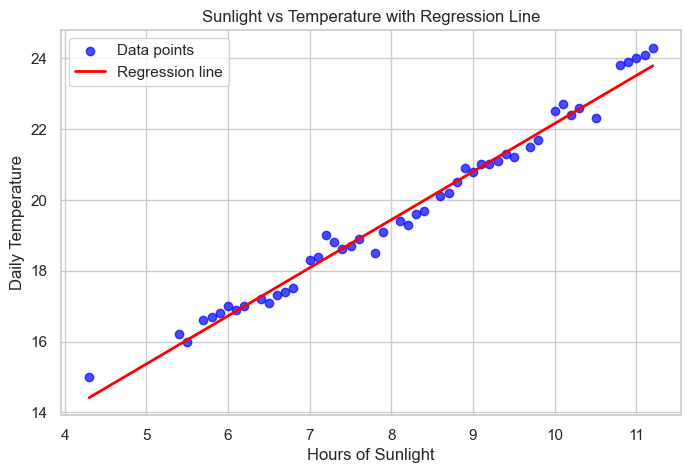

In [ ]:
plt.figure(figsize=(8, 5))

# Scatter of all data
plt.scatter(df['hours_sunlight'], df['daily_temperature'],
            color='blue', alpha=0.7, label='Data points')

# Regression line
x_line = np.linspace(df['hours_sunlight'].min(),
                     df['hours_sunlight'].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')

plt.xlabel("Hours of Sunlight")
plt.ylabel("Daily Temperature")
plt.title("Sunlight vs Temperature with Regression Line")
plt.legend()
plt.show()


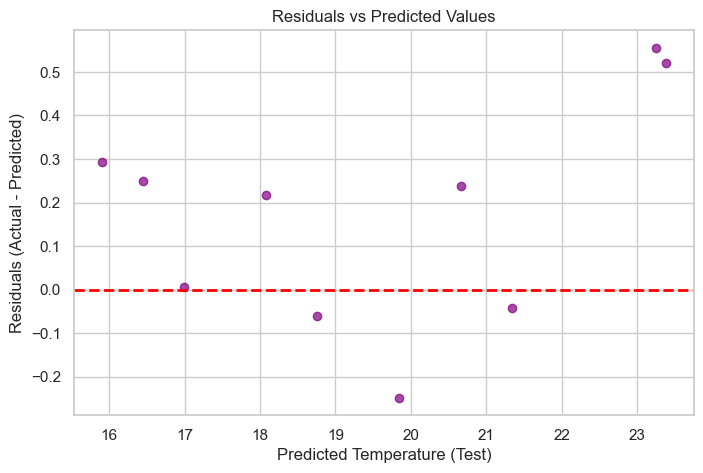

In [ ]:
# Residuals on test set
residuals = y_test - predict

plt.figure(figsize=(8, 5))
plt.scatter(predict, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Predicted Temperature (Test)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()


In [ ]:
import joblib
joblib.dump(model,'linear_model.pkl')
print("Model Saved")

Model Saved
